## Context :
It is super important for credit card companies around the world to be able to recognize fraudulent card transactions in order to prevent their customers from being charged for products that they did not purchase

## Dataset description :
The dataset contains transactions made by credit cards in September 2013 by European calfholders.<br>
This dataset presents transactions that occured in 2 days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.<br>
It contains only numerical input variables which are the result of a PCA transformation.<br>
Unfortunately, due to confidentiality issues, the original features and more background information about the data are not provided.<br>
Features V1, V2, … V28 are the principal components obtained with PCA.<br>
the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Importing  Libraries : 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data :

In [2]:
# Read the dataset
data = pd.read_csv("../Datasets/creditcard.csv")

# Print out the first rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Inspecting Data :

In [3]:
# Print a concise summary of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Return some information about each variable in the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Checking for missing values : 

In [5]:
# Number of missing values for each variable in the dataset 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Ploting correlations :

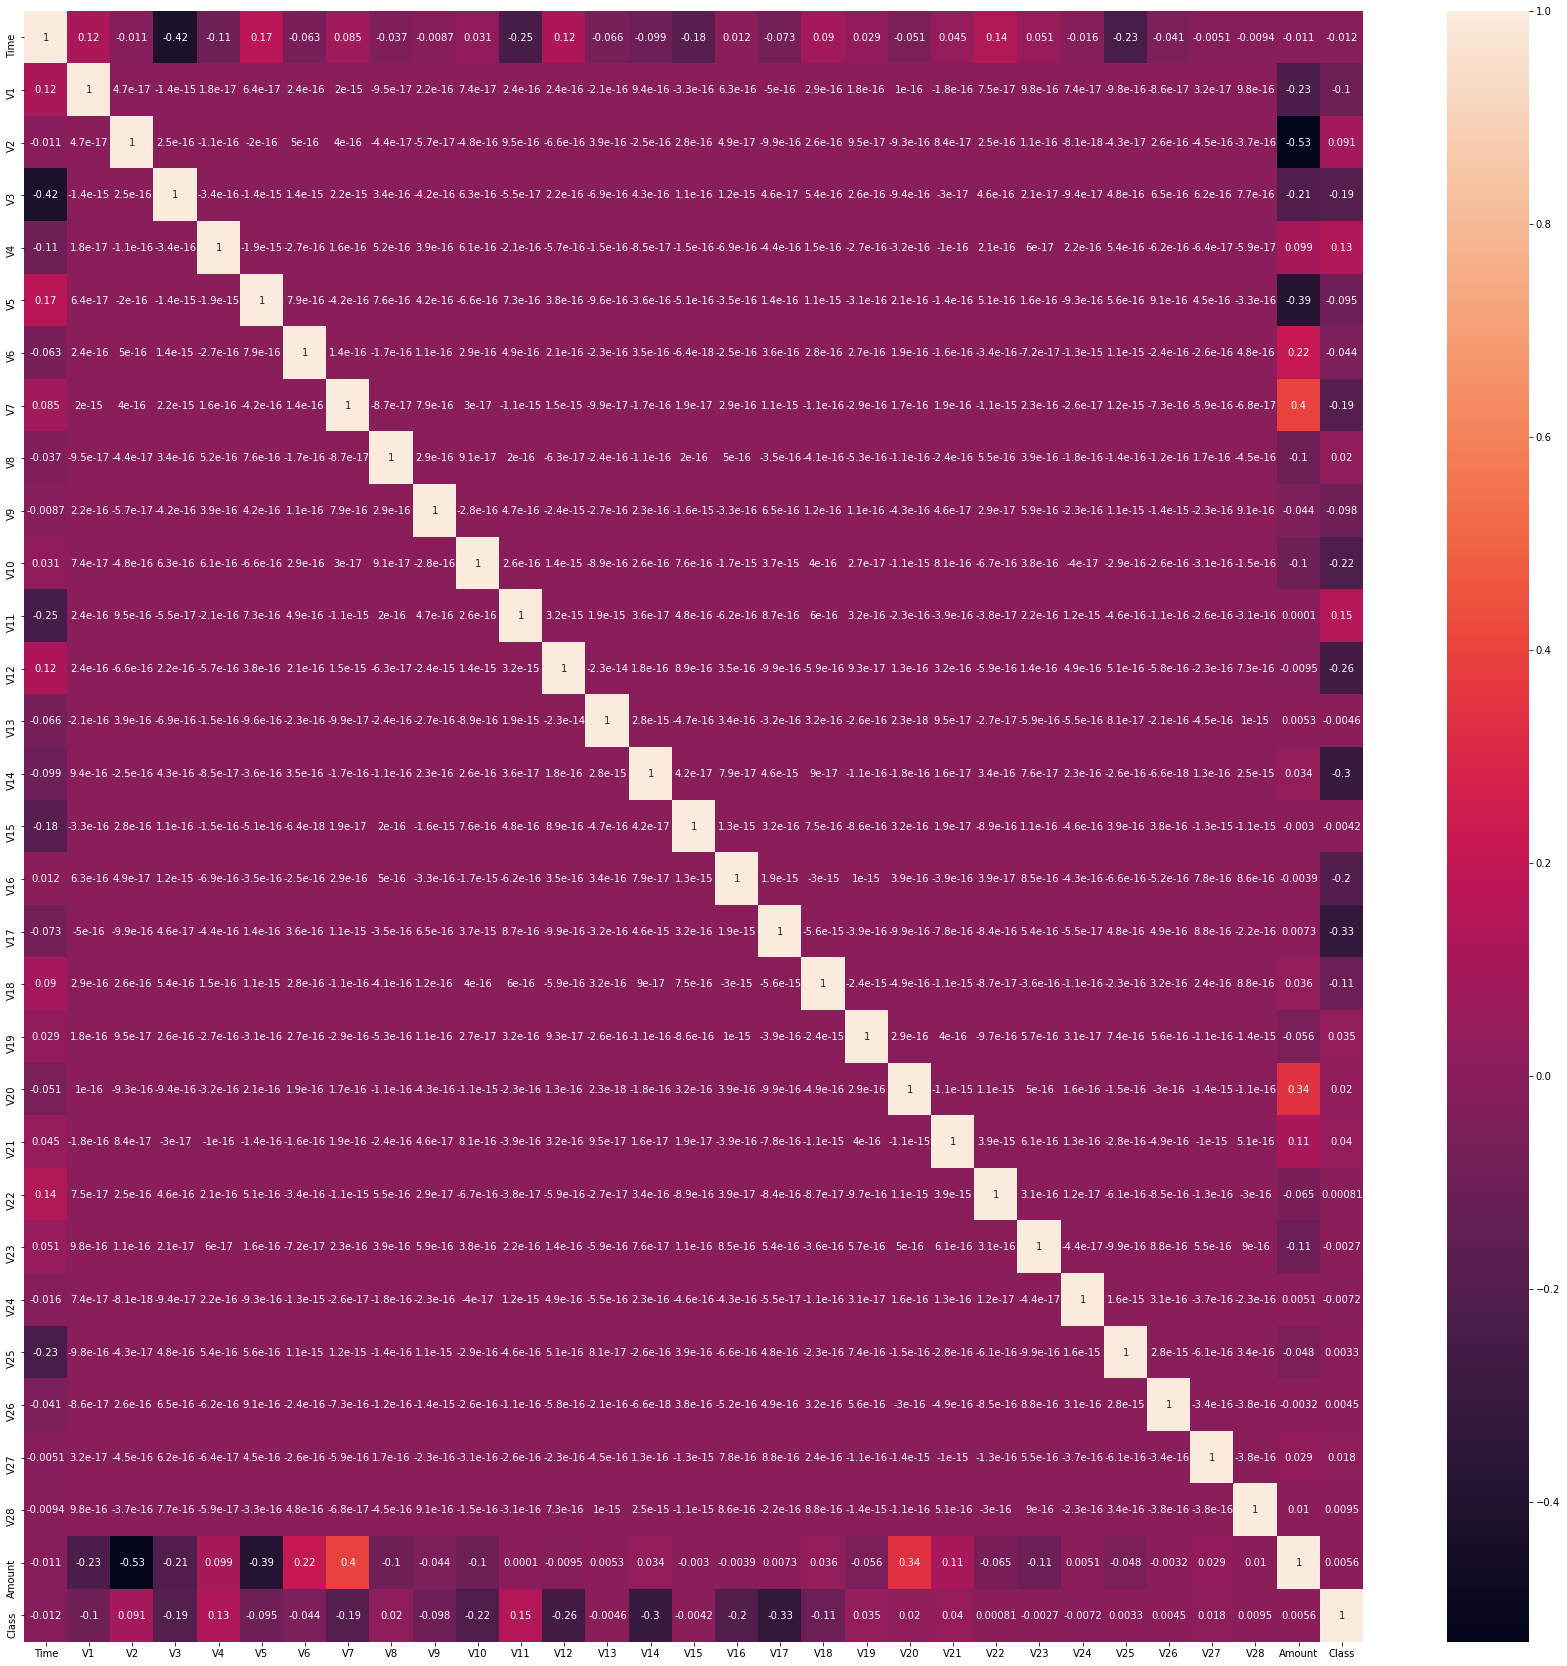

In [6]:
f, ax = plt.subplots(figsize=(30, 30))
corrMatrix = data.corr()
sns.heatmap(corrMatrix , annot=True , ax=ax)
plt.show()

## Checking target incidence
We want to predict whether or not a transaction is fraudulent. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:<br>
- **0** - the donor will not give blood.
- **1** - the donor will give blood.<br>
<br>
Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.

In [7]:
# Print target incidence proportions, rounding output to 3 decimal places
data.Class.value_counts(normalize=True).round(3)

0    0.998
1    0.002
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

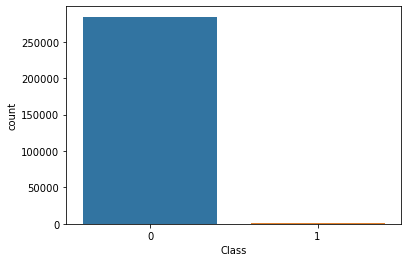

In [8]:
# let's have a look at the class
sns.countplot(x="Class", data=data)

The dataset is highly imbalanced ! This is bad news because classifiers will always predict the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one. To change that, I will proceed to random undersampling.

The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling.

To undersample, we can use the resample method from sklearn.utils!

In [9]:
target_0 = data[data["Class"]==0]

In [10]:
target_1 = data[data["Class"]==1]

In [11]:
from sklearn.utils import resample

In [12]:
# Downsample majority and combine with minority
fraud_downsampled = resample(target_0, replace = False,  n_samples = len(target_1), random_state = 123)
downsampled = pd.concat([fraud_downsampled, target_1])

<AxesSubplot:xlabel='Class', ylabel='count'>

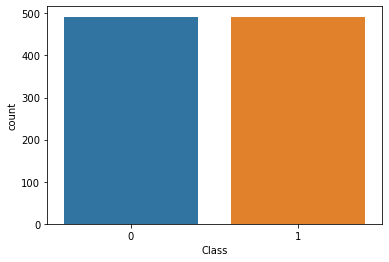

In [13]:
# Let's see the result 
sns.countplot(x="Class", data=downsampled)

## Splitting creditcard data into train and test datasets :
This is very easy to do using the **train_test_split()** method from the scikit learn library.

In [31]:
X = downsampled.drop("Class",axis=1).values
y = downsampled["Class"].values

In [33]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split creditcard DataFrame into
# X_train, X_test, y_train and y_test datasets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## First classifier, Decision tree :

In [34]:
# Importing modules
from sklearn.tree import DecisionTreeClassifier

# Define the model as the decision tree
classifier = DecisionTreeClassifier()

# Train the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

## Second classifier, Random Forest :

In [38]:
# Importing modules
from sklearn.ensemble import RandomForestClassifier

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

# Train the model 
model.fit(X_train, y_train)

# Predicting the Test set results 
predicted = model.predict(X_test)

## Evaluation :
Here we will use the 3 metrics offered by **sklearn** to evaluate our models.

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Decision tree model evaluation :

In [41]:
# Print the classifcation report 
print('Classification report:\n', classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       147
           1       0.91      0.89      0.90       149

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



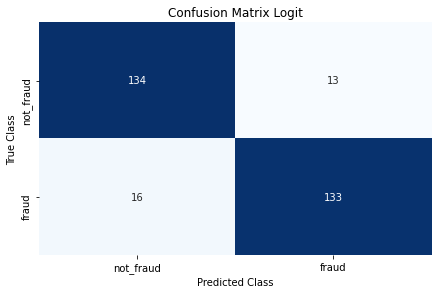

In [44]:
# Print the the confusion matrix
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_logit = pd.DataFrame(matrix, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Random forest model evaluation :

In [46]:
# Print the classifcation report 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('Classification report:\n', classification_report(y_test,predicted))

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       147
           1       0.96      0.88      0.92       149

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



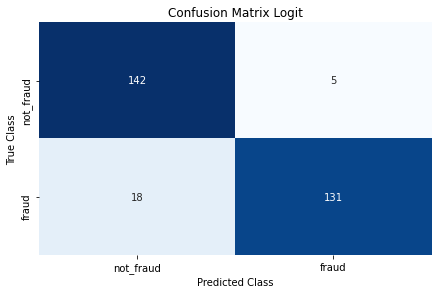

In [48]:
#print the confusion matrix 
matrix_logit = confusion_matrix(y_true=y_test, y_pred=predicted)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()